<div style="text-align:center;">
  <img src="https://github.com/MolSSI-Education/iqb-2025/blob/main/images/molssi_main_outline.png?raw=true\" style="display: block; margin: 0 auto; max-height:200px;">
</div>


# Cheminformatics: Molecular Similarity and Molecular Descriptors

<strong>Author(s):</strong> Jessica A. Nash, The Molecular Sciences Software Institute

<div class="alert alert-block alert-info">
<h2>Overview</h2>

<strong>Questions:</strong>

* How are molecules represented on computers for cheminformatics applications?

* How can I measure the similarity of two molecules?

* How can I find out if a molecule contains a particular substructure?

<strong>Objectives:</strong>

* Learn about graph representation of molecules.

* Learn about molecular fingerprints.

* Use RDKit to measure molecular similarity.

</div>


Cheminformatics is often used in the context of molecular discovery.
For example, you might want to process a large number of molecules to find molecules that are similar to a target, or that contain a particular functional group.
But how can you tell if two molecules are similar?

A chemist looking at two molecules might be able to make a judgment based on their chemical knowledge. However, when dealing with a large number of molecules, this problem can become intractable. There are ways to detect molecular similarity on a computer that allow fast comparison and processing of molecules.

## Graph Representation of Molecules
Graph theory is a branch of mathematics that studies the properties and applications of graphs, which are structures made up of nodes (or vertices) connected by edges (or lines).
A molecule can be represented as a graph where atoms are nodes and bonds are edges. This representation allows the use of various graph-based algorithms to analyze molecular structures.
The figure below (borrowed from Wikipedia) shows a graph with numbered nodes (circles) connected by edges (lines).


<div style="text-align:center;">
  <img src="https://github.com/MolSSI-Education/molssicheminfo/blob/master/images/molecular_graph.png?raw=true" style="display: block; margin: 0 auto; max-height:300px;">
</div>

Image from [Wikipedia: Graph theory](https://en.wikipedia.org/wiki/Graph_theory)

As a chemist, you probably don't have a hard time imagining a molecule as a graph. The atoms would be "nodes" in the graph, while the bonds would be "edges".
One can also represent bond order by changing the "weight" of graph edges.
In this view, one way to tell if molecules are the same is to check that their molecular graphs are the same.

### Substructure Searches

A substructure search is a cheminformatics technique used to identify molecules that contain a specific pattern or structure within a larger molecule.

The figure below shows the beneze substructure matched in the aspirin molecule.

<div style="text-align:center;">
  <img src="https://github.com/MolSSI-Education/molssicheminfo/blob/master/images/substructure.png?raw=true" style="display: block; margin: 0 auto; max-height:300px;">
</div>


One way this can be done is with graph representation and graph theory.
When doing substructure search using RDKit, it can check to see if the molecular graph for one molecule contains the molecular graph of a smaller molecule.
This is a concept called "**subgraph isomorphism**". You can see more about this topic in this [presentation](https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf).

This is all very nice information, but you actually don't have to fully understand it in order to do a substructure search. In the cells below, we demonstrate searching molecules for a smaller structure using substructure search. As you can see from the cells, this functionality is very nicely built into RDKit.

In [6]:
!pip install rdkit

## Substracture Matches with RDKit

Now we will move to RDKit and start looking at substructure matches. We'll begin with the SMILES string for caffeine (CN1C=NC2=C1C(=O)N(C(=O)N2C)C) which can be obtained from [PubChem](https://pubchem.ncbi.nlm.nih.gov/).

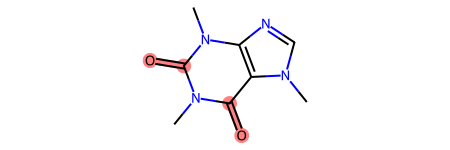

In [7]:
from rdkit import Chem

caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')                      # TO DO: Get the SMILES string for caffeine from PubChem(https://pubchem.ncbi.nlm.nih.gov/)
carbonyl = Chem.MolFromSmiles('C=O')                      # TO DO: Create or find the SMILES string for a carbonyl group

matches = caffeine.GetSubstructMatches(carbonyl)       # TO DO: Insert the variable that represents the substructure you want to find in caffeine in the parentheses

caffeine

As you can see above, we can define two molecules and search for one inside of the other.

<div class="alert alert-block alert-warning">
<h3>Check Your Understanding</h3>

Using the skills you've learned already, perform a substructure search for methyl groups in caffeine in the cell below.

</div>

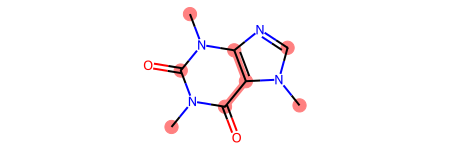

In [8]:
# put your code for a caffeine substructure search here

caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')                                # TO DO: Insert the SMILES string for caffeine
methyl = Chem.MolFromSmiles('C')                                  # TO DO: Insert the SMILES string for a methyl group

matches = caffeine.GetSubstructMatches(methyl)                         # TO DO: Look for methyl groups in caffeine

caffeine

From the substructure search in the cell above, you are probably seeing that you're not matching exactly what you want. In order to find just the methyl groups, we have to use yet another molecular representation.

#### SMARTS Strings
A [SMARTS (SMiles ARbitrary Target Specification)](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification) string is a pattern-matching language for specifying substructures in molecules. It is similar to SMILES but has additional features for specifying atom and bond properties. In contrast to SMILES, SMARTS allows for specifying substructures based on patterns of atoms and bonds, rather than just specifying the exact arrangement of atoms and bonds in a molecule.

In this case, we want to highlight the methyl group in caffeine, which contains a single carbon atom bonded to three hydrogen atoms. We can use a SMARTS string to define this substructure as `[CH3]`, which represents a carbon atom with three hydrogen atoms bonded to it.

Using a SMARTS string is necessary in this case because simply searching for a single carbon atom with the code `carbon = Chem.MolFromSmiles('C')` highlights all carbons in the molecule, not just the methyl group. By using a SMARTS string, we can specify the exact substructure we want to highlight and avoid highlighting unintended parts of the molecule.

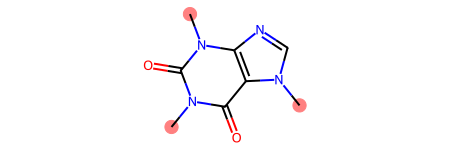

In [10]:
caffeine = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")                    # TO DO: Enter the SMILES string for caffeine
methyl_pattern = Chem.MolFromSmarts("[CH3]")              # TO DO: Enter the SMARTS string for the methyl group [CH3]

# Get the indices of the matching atoms
matches = caffeine.GetSubstructMatches(methyl_pattern)             # TO DO: Enter the variable for the pattern you are looking for in caffeine
caffeine

### Exercise

Create an RDKit molecule object for aspirin. You can find its SMILES representation by using [PubChem](https://pubchem.ncbi.nlm.nih.gov/).

Visualize the molecule, highlighting any carboxyl groups in the structure. Use a SMARTS string to define the carboxyl group substructure.

**Important:** Unless you know the rules for writing SMARTS strings (which you would have learned somewhere else, because we didn't cover it), it's unlikely that you'll guess what the SMARTS for carboxyl is. You can see a list of SMARTS strings for different functional groups [at this link](https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html).



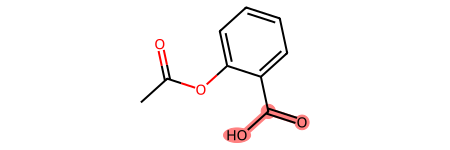

In [11]:
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')                         # TO DO: Insert the SMILES string for aspirin between the quote signs
carboxyl_pattern = Chem.MolFromSmarts('[CX3](=O)[OX2H1]')                # TO DO: Go to https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html to find the SMARTS string for carboxyl group

# Get the indices of the matching atoms

matches = aspirin.GetSubstructMatches(carboxyl_pattern)                  # TO DO: Enter the variable for the pattern you are looking for in aspirin
aspirin


## Molecular Fingerprints
Molecular fingerprints are representations of molecules that are usually bit strings, or vectors of 0's and 1's. Fingerprints are built by considering the molecular structure (often as a graph representation) and applying a certain algorithm to create the vector. The image below shows a representation of a molecular fingerprint. The molecule is separated into different parts with each part setting a bit (changing a 0 to a 1) in the fingerprint.

<div style="text-align:center;">
  <img src="https://github.com/MolSSI-Education/molssicheminfo/blob/master/images/molecular_fingerprint.png?raw=true" style="display: block; margin: 0 auto; max-height:200px;">
</div>



Image from [Chemistry LibreTexts](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.01%3A_Molecular_Descriptors) [Cheminformatics Course](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics)

The exact fingerprint will depend on the algorithm that is used to construct it.
There are many different fingerprinting algorithms. But they tend to fall into two types of groups - similarity or substructure fingerprints. A common similarity fingerprint that is used is the Morgan fingerprint. A common substructure fingerprint that is used is the [Daylight fingerprint](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html) (the RDKFingerprint is a Daylight-like fingerprint).

The cell below calculates the RDKit fingerprint for caffeine.

In [13]:
from rdkit.Chem import AllChem

aspirin = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")                            # TO DO: Insert the SMILES string for aspirin
benzene = Chem.MolFromSmiles("c1ccccc1")                            # TO DO: Insert the SMILES string for benzene - Can you predict it?

aspirin_fingerprint = AllChem.RDKFingerprint(aspirin)

type(aspirin_fingerprint)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

You usually wouldn't interact with a fingerprint directly, but using RDKit we can examine it to understand more about how it works.
We can print the bit string representation using `.ToBitString`.

In [14]:
aspirin_fingerprint.ToBitString()

'000000000000000000000001000000100001000001001000101010000000001000000010001000000001000000011100010000010000100000010000000000000100000000100000010000101000000001110000001001000000000000000000001011000010010011000011100000000100000001000000001100010000000000000100000001000000010000100100000000100000000010000000010000000000001000110001000000101010000000000000001000000000000000000000010010100000100000010001000001000000000010010000100101000101010100000001000001000000010101000101001100000000000000000010001010000100000000100000000000000100000000000100000000010011000000000000000001000000110000001001010001001001000000000000000000010000000000001001101000010110000000000000000010000000001000000010000000001000000000000000100100000000000100010000100001000000100110000110000000000011010010000000101010000000000000000000000000010000001000100100001000000100001100000000000110001000000000010000000001000000000000000100001100000100001101100000001000001010000010100101000000001000101001000000001010100100000

If you print the benzene string, you will see a string of the same length, but with fewer bits set.
There are fewer bits because there are fewer molecular patterns in the smaller molecule.

In [15]:
benzene_fingerprint = AllChem.RDKFingerprint(benzene)            # TO DO: Insert the variable that represents the benzene mol object
benzene_string = benzene_fingerprint.ToBitString()        # You need the parentheses after ToBitString because it is a method, but the parentheses are empty in this case.

print(benzene_string)

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000010000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Using this bit string, we can do a number of different analyses.
For example, substructure searches using bit strings check that bits that are set in the smaller molecule are also set in the larger target molecule.


<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Fill in the for loop below to check that bits set in the aspirin fingerprint string are also set in the benzene fingerprint string.

</div>

In [21]:
aspirin_string = aspirin_fingerprint.ToBitString()
num_bits = len(benzene_string)
matches = 0

for i in range(num_bits):
    if benzene_string[i] == "1":
        print(aspirin_string[i] == benzene_string[i])                                 # TO DO: enter a boolean comparison of each item in the aspirin string to each item in the benzene string
        matches +=1                                # TO DO: increment the counter

print(f"There are {matches} positions where the benzene fingerprint matches the aspirin fingerprint.")

True
True
True
True
True
True
True
True
True
True
True
True
There are 12 positions where the benzene fingerprint matches the aspirin fingerprint.


The above output tells us that every bit that is set in the benzene fingerprint is also set in the aspirin target. Fingerprint substructure searches are often used for faster, but less accurate substructure searches, and are commonly used for screen large numbers of molecules quickly.

### Measuring Similarity

Because the fingerprints are numbers, we can measure how similar two fingerprints are using different similarity metrics.
One common similarity metric is called the Tanimoto similarity.
 The Tanimoto similarity is calculated as follows:

$$
T(A, B) = \frac{A \cap B}{A + B - A \cap B}
$$

Where:
- $A$ and $B$: are the sets of bits in the fingerprint vectors for molecules $A$ and $B$ respectively.
- $A \cap B$: This represents the intersection of sets $A$ and $B$, i.e., the number of bits that are '1' (set) in both $A$ and $B$.
- $A + B$: This is the sum of all '1' bits in both $A$ and $B$.
- $A + B - A \cap B$: This term represents the union of sets $A$ and $B$, calculated as the total number of unique '1' bits across both fingerprints.

The Tanimoto similarity ranges from 0.0 to 1.0, with 1.0 representing identical fingerprints.

In [22]:
from rdkit import DataStructs

DataStructs.TanimotoSimilarity(benzene_fingerprint, aspirin_fingerprint)

0.03389830508474576

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Use the Tanimoto similarity to measure if benzene is more similar to pyridine or aniline using the RDKit fingerprint. For this type of exercise, it is best to break it down in a series of steps. In this case:

* Get the SMILES strings for aniline and pyridine from [PubChem](https://pubchem.ncbi.nlm.nih.gov/) and assign each to a variable.
* Use AllChem.RDKFingerprint to generate the fingerprint for each molecule.
* Use the TanimotoSimilarity function to compare each molecule to benzene.

</div>

In [23]:
aniline = Chem.MolFromSmiles('C1=CC=C(C=C1)N  ')                             # TO DO: Get the SMILES string for aniline from PubChem(https://pubchem.ncbi.nlm.nih.gov/)
pyridine = Chem.MolFromSmiles('C1=CC=NC=C1')                            # TO DO: Get the SMILES string for pyridine from PubChem(https://pubchem.ncbi.nlm.nih.gov/)

aniline_fingerprint = AllChem.RDKFingerprint(aniline)               # TO DO: Generate the fingerprint for aniline
pyridine_fingerprint = AllChem.RDKFingerprint(pyridine)              # TO DO: Generate the fingerprint for pyridine

similarity = DataStructs.TanimotoSimilarity(benzene_fingerprint, aniline_fingerprint)                                   # TO DO: Compare the fingerprints for benzene and aniline
print(f"The Tanimoto similarity of benzene and aniline is {similarity}.")

similarity = DataStructs.TanimotoSimilarity(benzene_fingerprint, pyridine_fingerprint)                                   # TO DO: Compare the fingerprints for benzene and pyridine
print(f"The Tanimoto similarity of benzene and pyridine is {similarity}.")

The Tanimoto similarity of benzene and aniline is 0.3157894736842105.
The Tanimoto similarity of benzene and pyridine is 0.22857142857142856.


## Molecular Descriptors

The fingerprints discussed above are examples of **molecular descriptors**.

A molecular descriptor is a numerical value that represents some property of a molecule.
If we want to be able to create a model that describes chemical behavior, we have to be able to convert information about molecules into numerical representations.
This is where the concept of a molecular descriptor comes in.

Descriptors can be 0 dimensional (molecular weight, number of heavy atoms, etc.), 1 dimensional (counts of atom types, hydrogen bond donors/acceptors), 2 dimensional (fingerprints, other graph representations), 3 dimensional (polar surface area). The dimensionality of the descriptor defines what kind of dimensional information you need about the molecule in order to define the descriptor. For example, the fingerprint, a 2D descriptor, depends on the connectivity, or 2 dimensional structure of the molecule.

RDKit supports the calculation of many molecular descriptors. You can see a [full list of RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) or [see the module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html).

To get molecular descriptors from RDKit, we import the `Descriptors` module.

```python
from rdkit.Chem import Descriptors
```

To get a descriptor, you do

```python
Descriptors.descriptor_name(molecule_variable)

```

For example, we can calculate the molecular weight of our caffeine molecule

In [24]:
from rdkit.Chem import Descriptors

caffeine_mol_wt = Descriptors.MolWt(caffeine)     # TO DO: insert the name of the RDKit mol object for caffeine that you defined above
print(caffeine_mol_wt)                                   # TO DO: print the molecular weight of caffeine

194.194


RDKit provides hundreds of molecular descriptors.
You can calculate all of the molecular descriptors for a molecule at once using `CalcMolDescriptors`.

As an example of how we can apply molecular descriptors to make predictions, we will consider Lipinski's Rule of 5.
Lipinski's Rule of 5 is a **guideline** that helps determine if a drug is likely to be absorbed well by the body. It states that good oral drugs typically have no more than 5 hydrogen bond donors, 10 hydrogen bond acceptors, a molecular weight under 500 daltons, and a log P (measure of solubility) under 5.

* Molecular Weight <= 500 Da
* No. Hydrogen Bond Donors <= 5
* No. Hydrogen Bond Acceptors <= 10
* LogP <= 5

In [25]:
MW = Descriptors.MolWt(aspirin)
HBA = Descriptors.NOCount(aspirin)
HBD = Descriptors.NHOHCount(aspirin)
LogP = Descriptors.MolLogP(aspirin)

rules = [ MW <= 500, HBD <=5, HBA <=10, LogP <=5 ]
print(rules)

[True, True, True, True]


Based on these rules, aspirin is expected to be well-absorbed by the body.

<div class="alert alert-block alert-warning">
<h2>Final Challenge</h2>

Check Lipinski's Rule of 5 for [insulin](https://pubchem.ncbi.nlm.nih.gov/compound/Insulin#section=Canonical-SMILES).
Do you expect that insulin will be well-absorbed when taken orally based on these criteria?
</div>

In [33]:
# Create an RDKit mol object for insulin, using the SMILES string for insulin from PubChem  ### i used fasta method to shorten smiles string
insulin = Chem.MolFromFASTA('MALWMRLLPLLALLALWGPDPAAA... ')


In [38]:
# Determine the Lipinski descriptors for insulin using the RDKit mol object for insulin
MW = Descriptors.MolWt(insulin)
HBA = Descriptors.NOCount(insulin)
HBD = Descriptors.NHOHCount(insulin)
LogP = Descriptors.MolLogP(insulin)
rules_2 = [ MW <= 500, HBD <=5, HBA <=10, LogP <=5 ]
print(rules_2)



[False, False, False, True]


In [39]:
# Determine how these descriptors compare with Lipinski's rule of 5
print(f"molecular weight: {MW}")
print(f"hydrogen bond donors: {HBD}")
print(f"hydrogen bond acceptors: {HBA}")
print(f"logP: {LogP}")

molecular weight: 5793.643999999988
hydrogen bond donors: 88
hydrogen bond acceptors: 142
logP: -19.762430000000357
